In [416]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

Importamos los datos.

In [417]:
df = pd.read_csv("datos/encoded.csv", index_col = 0)

In [418]:
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,abtest_control,abtest_test
0,5224.771092,480.0,4891.401940,4419.953028,4489.537537,-0.382606,0.0,2581.485607,4310.720546,5121.140345,3261.357242,5222.235563,6006.756621,0.0,1.0
1,5224.771092,18300.0,7797.375426,9737.349721,4489.537537,1.218855,-0.5,5438.022583,7771.228940,7663.477096,2346.622617,5222.235563,6006.756621,0.0,1.0
2,5224.771092,9800.0,11141.786746,4419.953028,8570.658072,0.790609,-0.5,5450.230558,7771.228940,8784.842776,3261.357242,5222.235563,6006.756621,0.0,1.0
3,5224.771092,1500.0,2878.317321,4419.953028,4489.537537,-0.642369,0.0,5514.101940,4310.720546,5121.140345,6109.421964,5222.235563,4265.648396,0.0,1.0
4,5224.771092,3600.0,2878.317321,4419.953028,4489.537537,-0.741195,-1.2,5680.468025,7771.228940,6320.056395,6109.421964,5222.235563,6006.756621,0.0,1.0


Creamos una función que seleccione aquella configuración de columnas que minimice RMSE (también se podría escoger cualquier otra métrica). En este caso el RMSE nos servirá para comprobar de forma estricta cuánto se equivoca nuestro modelo a la hora de predecir.

In [419]:
dict_randoms = {}
for k in range(6): # Número de columnas que serán eliminadas
    for _ in range(20): # Hacemos 20 iteraciones
        df_drop = df.copy() # Usamos una copia para no sobreescribir el dataframe original
        dropcols = rand.choices(df_drop.drop(columns=["price"]).columns, k = k) # Columnas a dropear por iteración
        df_drop = df_drop.drop(columns = dropcols)
        X = df_drop.drop(columns = "price")
        y = df_drop["price"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train) # Generamos las predicciones de los datos
        y_test_pred = model.predict(X_test)
        ## Diccionario con las métricas
        metricas = {
            'train': {
                'r2_score': r2_score(y_train, y_train_pred),
                'MAE': mean_absolute_error(y_train, y_train_pred),
                'MSE': mean_squared_error(y_train, y_train_pred),
                'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
            },
            'test': {
                'r2_score': r2_score(y_test, y_test_pred),
                'MAE': mean_absolute_error(y_test, y_test_pred),
                'MSE': mean_squared_error(y_test, y_test_pred),
                'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

            }
        }

        if not dict_randoms: # Si el diccionario está vacío
            dict_randoms["metricas"] = metricas
            dict_randoms["dropped"] = dropcols  

        elif dict_randoms["metricas"]["train"]["RMSE"] > metricas["train"]["RMSE"]: # Buscamos quedarnos con aquella configuración con menor RMSE
            dict_randoms["metricas"] = metricas
            dict_randoms["dropped"] = dropcols

Vemos que para minimizar el RMSE no nos conviene deshacernos de ninguna columna.

In [420]:
dict_randoms

{'metricas': {'train': {'r2_score': 0.6168988346156672,
   'MAE': 2479.278459617148,
   'MSE': 12116741.371112952,
   'RMSE': 3480.9109972984015},
  'test': {'r2_score': 0.6135953089552342,
   'MAE': 2474.7102084793405,
   'MSE': 12151615.960397089,
   'RMSE': 3485.916803424472}},
 'dropped': []}

In [421]:
df.drop(columns=dict_randoms["dropped"], inplace=True)

In [422]:
X = df.drop(columns = "price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [423]:
model = LinearRegression()

In [424]:
model.fit(X_train, y_train)

LinearRegression()

In [425]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [426]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [427]:
metricas

{'train': {'r2_score': 0.6168988346156672,
  'MAE': 2479.278459617148,
  'MSE': 12116741.371112952,
  'RMSE': 3480.9109972984015},
 'test': {'r2_score': 0.6135953089552342,
  'MAE': 2474.7102084793405,
  'MSE': 12151615.960397089,
  'RMSE': 3485.916803424472}}

Para visualizar qué tan bien predice nuestro modelo (además de las métricas), podemos crear unas visualizaciones. En primer lugar, hacemos un plot de residuos, que se definen como la diferencia entre el valor predicho y el valor real. En el otro eje representamos los reales, de tal forma que la visualización nos permita deducir de un vistazo si nuestro modelo predice precios por encima o debajo de lo que debería. Además trazamos una línea en RES = 0, que indica la que sería una predicción perfecta. También lo haremos para el RES en relativo.

In [428]:
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

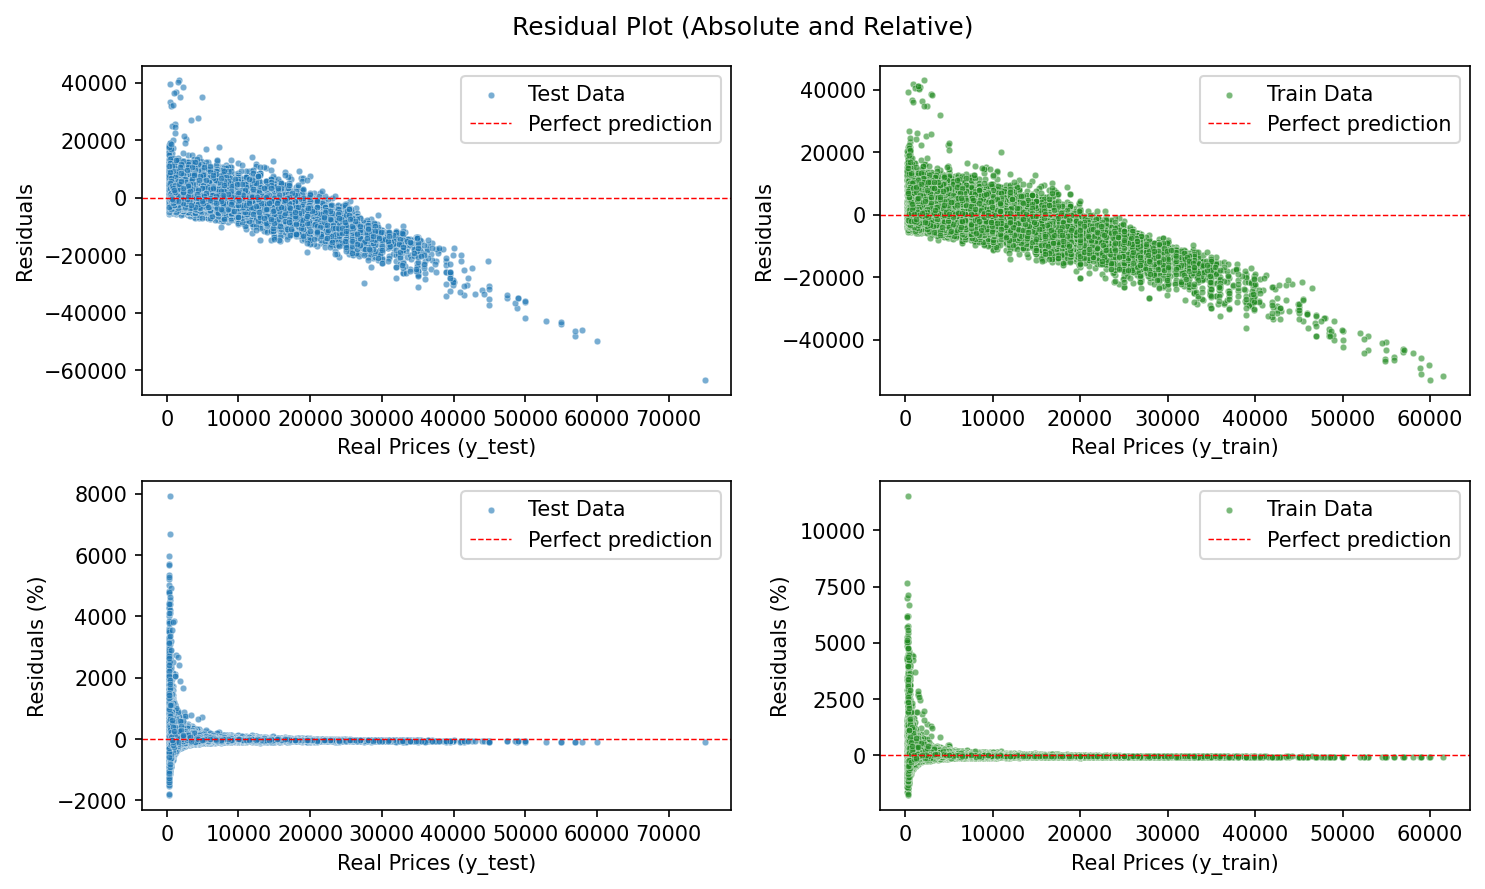

In [429]:
plt.figure(figsize=(10,6), dpi = 150)
plt.suptitle('Residual Plot (Absolute and Relative)')

residuals = y_test_pred-y_test
plt.subplot(2,2,1)
sns.scatterplot(x = y_test, y = residuals, alpha=0.6, s = 10, label = "Test Data")
plt.axhline(0, color='red', linestyle='--', label = "Perfect prediction", lw = 0.7)
plt.xlabel('Real Prices (y_test)')
plt.ylabel('Residuals')
plt.legend()

residuals = y_train_pred-y_train
plt.subplot(2,2,2)
sns.scatterplot(x = y_train, y = residuals, alpha=0.6, s = 10, color = "forestgreen", label = "Train Data")
plt.axhline(0, color='red', linestyle='--', label = "Perfect prediction", lw = 0.7)
plt.xlabel('Real Prices (y_train)')
plt.ylabel('Residuals')
plt.legend()

residuals = (y_test_pred-y_test)/y_test * 100
plt.subplot(2,2,3)
sns.scatterplot(x = y_test, y = residuals, alpha=0.6, s = 10, label = "Test Data")
plt.axhline(0, color='red', linestyle='--', label = "Perfect prediction", lw = 0.7)
plt.xlabel('Real Prices (y_test)')
plt.ylabel('Residuals (%)')
plt.legend()

residuals = (y_train_pred-y_train)/y_train * 100
plt.subplot(2,2,4)
sns.scatterplot(x = y_train, y = residuals, alpha=0.6, s = 10, color = "forestgreen", label = "Train Data")
plt.axhline(0, color='red', linestyle='--', label = "Perfect prediction", lw = 0.7)
plt.xlabel('Real Prices (y_train)')
plt.ylabel('Residuals (%)')
plt.legend()

plt.tight_layout()
plt.show()



Observamos que nuestro modelo no predice del todo bien, y es especialmente malo a menor precio. Además, cuanto mayor precio también predice más por debajo del valor esperado.

También podemos comparar ambas medidas, la predicha y la real, con una recta diagonal que nos indicaría cuándo x = y, es decir, cuando el valor predicho coincide con el real. Así, al igual que la visualización anterior, podemos observar si nuestra predicción está por encima o por debajo.

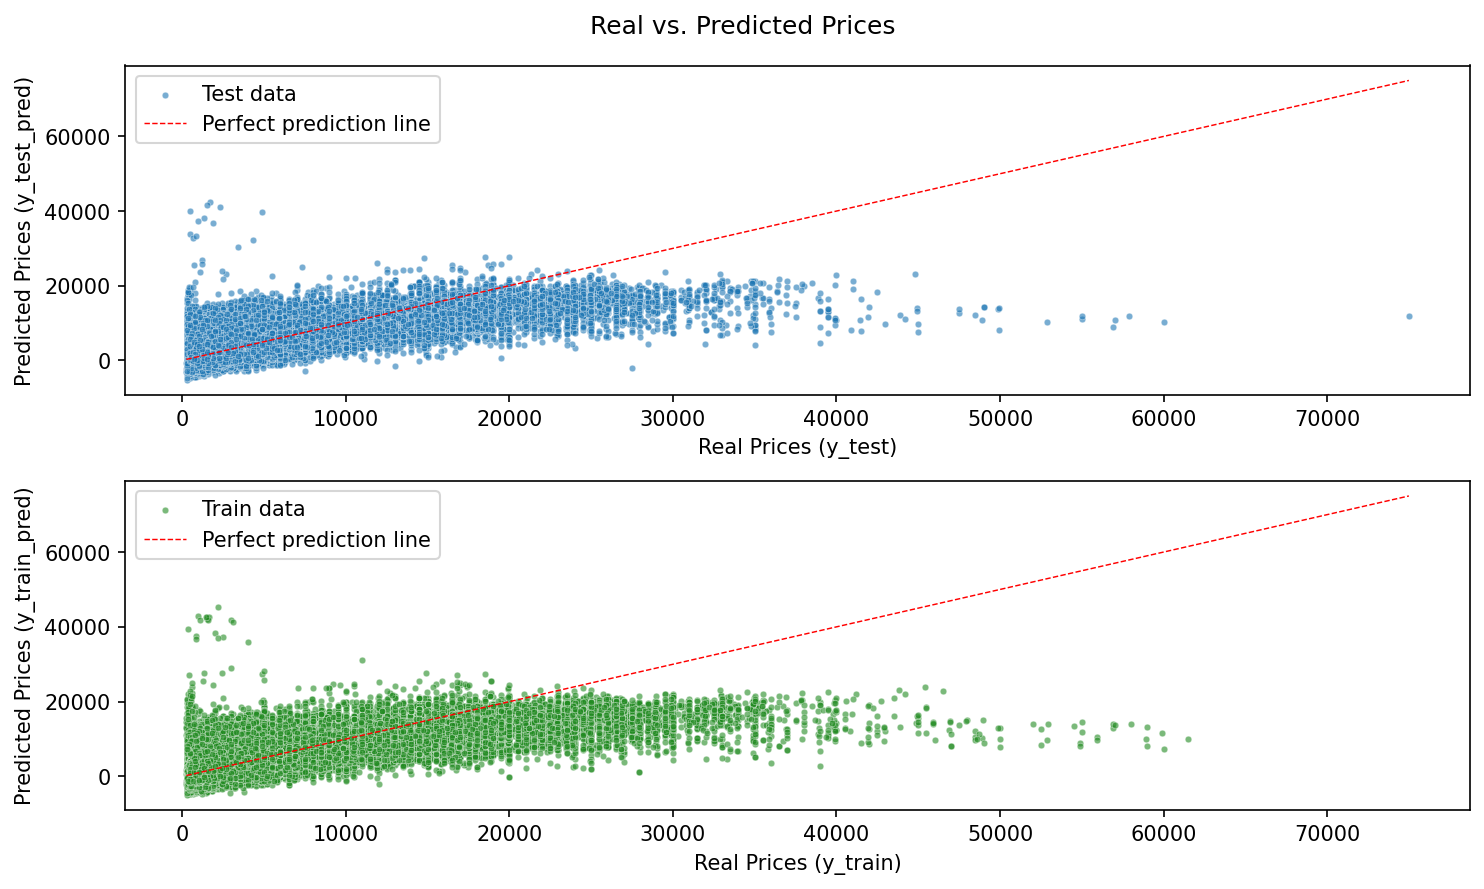

In [433]:


plt.figure(figsize=(10,6), dpi = 150)
plt.suptitle('Real vs. Predicted Prices')

plt.subplot(2,1,1)
sns.scatterplot(x = y_test, y = y_test_pred, alpha=0.6, s = 10, label = "Test data")
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', linestyle='--', label = "Perfect prediction line", lw = 0.7)
plt.xlabel('Real Prices (y_test)')
plt.ylabel('Predicted Prices (y_test_pred)')

plt.legend()

plt.subplot(2,1,2)
sns.scatterplot(x = y_train, y = y_train_pred, alpha=0.6, s = 10, color = "forestgreen", label = "Train data")
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', linestyle='--', label = "Perfect prediction line", lw = 0.7)
plt.xlabel('Real Prices (y_train)')
plt.ylabel('Predicted Prices (y_train_pred)')
plt.legend()

plt.tight_layout()
plt.show()


Esta gráfica muestra la misma información que la de residuos absolutos, ya que los residuios resultan de una diferencia entre ambas variables. Como es de esperar, observamos lo mismo que antes, donde el modelo no es capaz de predecir los valores de una forma satisfactoria. Esto se podría mejor iterando y modificando pasos anteriores como el tratamiento de outliers, la estandarización e incluso el tratamiento de los nulos.